In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data=pd.read_csv("../Data/data.txt", header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

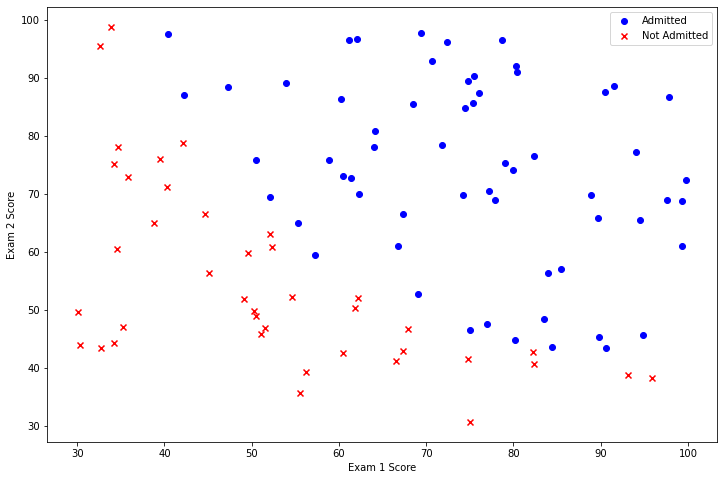

In [36]:
positive = data[data['Admitted']==1]
negative = data[data['Admitted']==0]
plt.figure(figsize=(12,8))
plt.scatter(positive['Exam 1'], positive['Exam 2'], c='b',marker='o')
plt.scatter(negative['Exam 1'], negative['Exam 2'], c='r',marker='x')
plt.legend(['Admitted','Not Admitted'])
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()

In [37]:
cols = data.shape[1]
X = np.array(data.iloc[:,0:cols-1].values)
Y =np.array(data.iloc[:,cols-1:cols].values).ravel()
print(X.shape, Y.shape)

(100, 2) (100,)


In [38]:
LRM = LogisticRegression(solver='liblinear')
#Using the open source liblinear library implementation, the coordinate axis descent method is used internally to iteratively optimize the loss function
LRM.fit(X,Y)

LogisticRegression(solver='liblinear')

In [41]:
predictions = LRM.predict(X)
print('accuracy:',accuracy_score(Y, predictions))

accuracy: 0.87


[-3.89977794] [[0.03844482 0.03101855]]


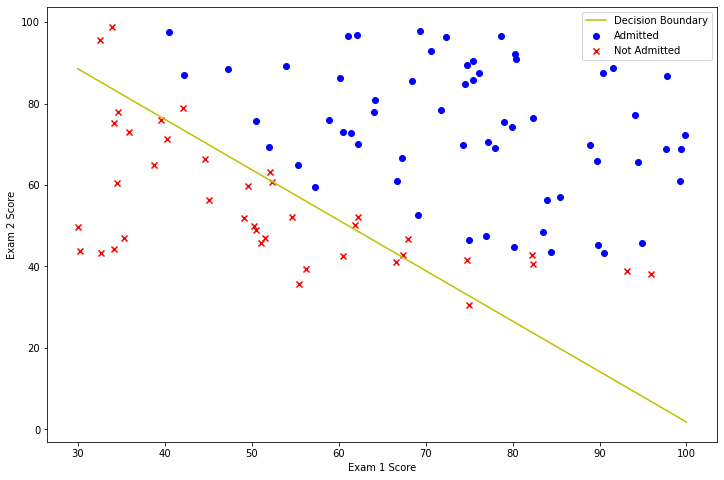

In [40]:
print(LRM.intercept_, LRM.coef_)
predict_Exam1 = np.linspace(30, 100, 100)
predict_Exam2 = ( - LRM.intercept_ - LRM.coef_[0,0] *predict_Exam1) / LRM.coef_[0,1]
plt.figure(figsize=(12,8))
plt.plot(predict_Exam1, predict_Exam2, 'y', label='Decision Boundary')
plt.scatter(positive['Exam 1'], positive['Exam 2'], c='b', marker='o', label='Admitted')
plt.scatter(negative['Exam 1'], negative['Exam 2'], c='r', marker='x', label='Not Admitted')
plt.legend()
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()